In [7]:
!pip install dython

In [8]:
import numpy as np
import pandas as pd

In [21]:
df_raw = pd.read_csv('fraud_raw.csv')
df_raw.shape

(1000000, 32)

In [22]:
df_cut = df_raw.sample(50000,random_state=22)
df_cut.shape

(50000, 32)

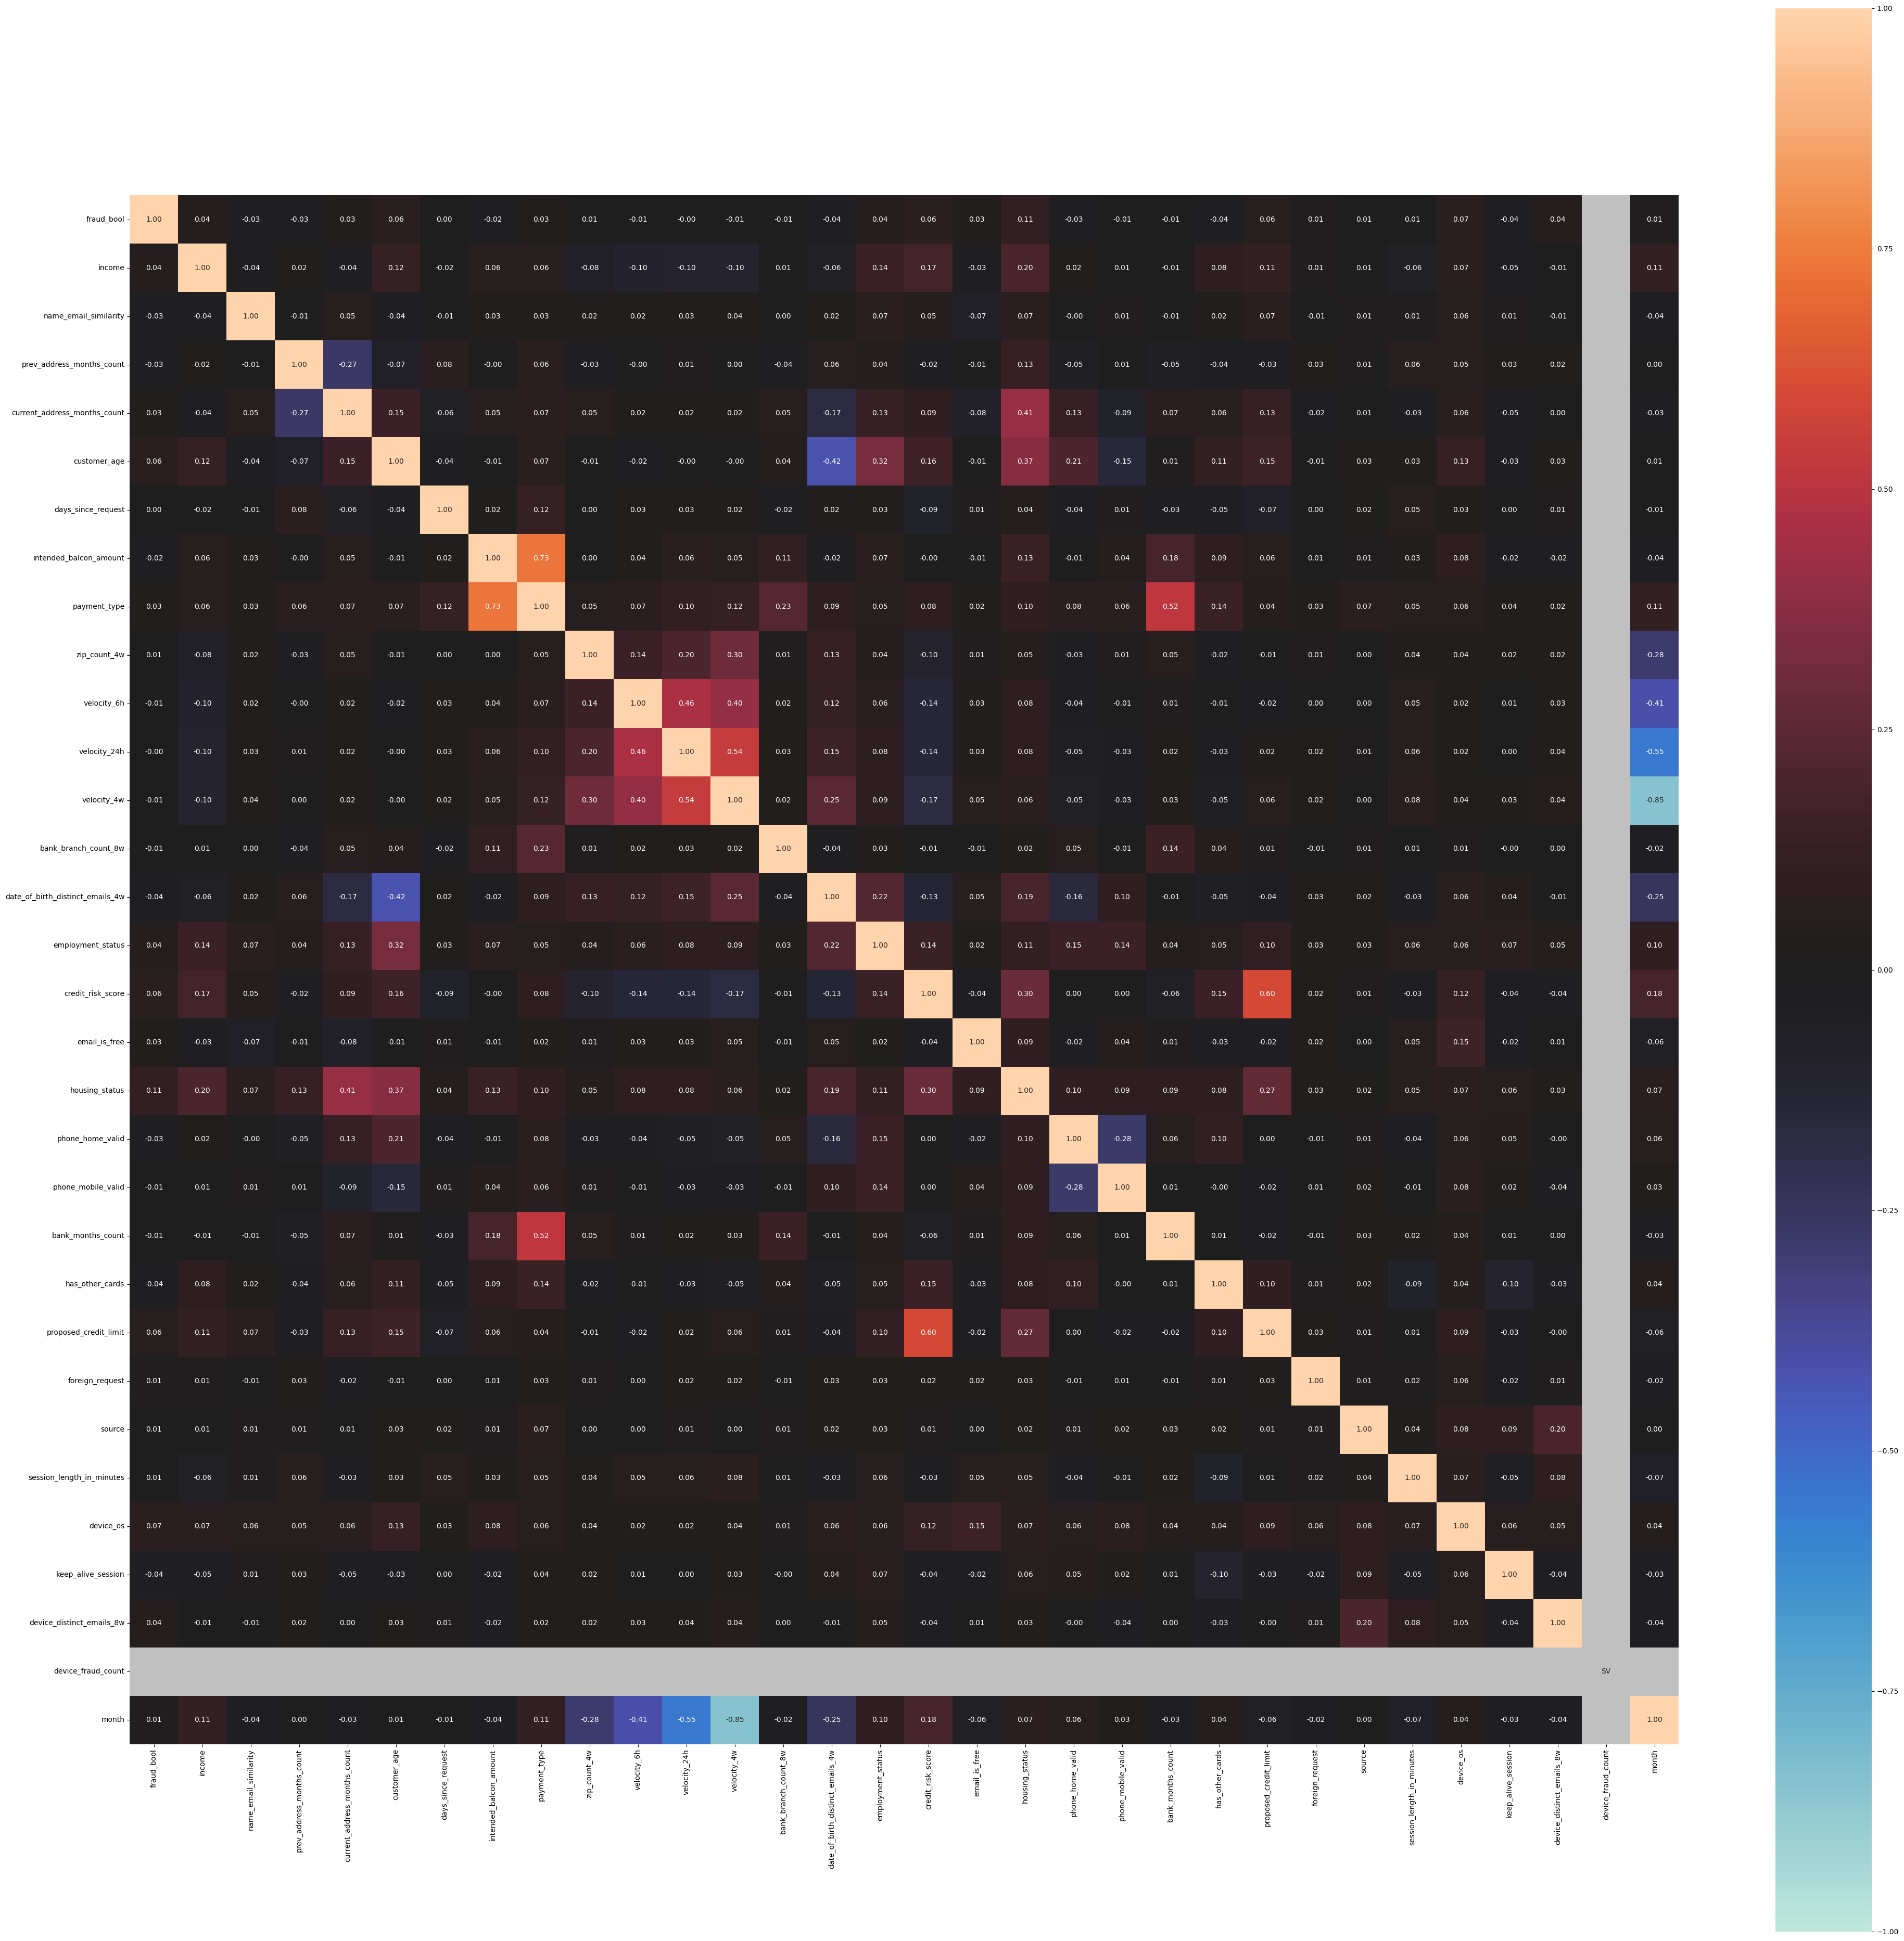

Index(['name_email_similarity', 'prev_address_months_count',
       'days_since_request', 'intended_balcon_amount', 'zip_count_4w',
       'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'phone_home_valid',
       'phone_mobile_valid', 'bank_months_count', 'has_other_cards',
       'foreign_request', 'source', 'session_length_in_minutes',
       'keep_alive_session', 'device_fraud_count', 'month'],
      dtype='object')

In [ ]:
from dython.nominal import associations

result = associations(df_cut)
correlation  = result['corr']
correlation_target = correlation["fraud_bool"]
uncorrelated = correlation_target[correlation_target.abs() < 0.02].index
uncorrelated

In [28]:
df_droped_uncorrelated.columns

Index(['fraud_bool', 'income', 'current_address_months_count', 'customer_age',
       'payment_type', 'employment_status', 'credit_risk_score',
       'email_is_free', 'housing_status', 'proposed_credit_limit', 'device_os',
       'device_distinct_emails_8w'],
      dtype='object')

In [26]:
df_droped_uncorrelated = df_cut.drop(columns=uncorrelated)
df_droped_uncorrelated = df_droped_uncorrelated.drop(["intended_balcon_amount"], axis=1)

KeyError: "['intended_balcon_amount'] not found in axis"